In [1]:
# I didn't finish the coulomb force function but I've left what I have for now.

'C:\\Users\\bubbl\\OneDrive\\Desktop\\MOLSIM\\Homeworks\\Homework_w04\\Miwa'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from scipy.spatial import distance_matrix
from md import Atom, molecular_dynamics, optimize_geometry, f_coulomb
from Miwa_mdplot import plot_md_frame, animate_md_traj

np.random.seed(7)

# Homework Assignment:
---

Update the `f_coulomb` function in `md.py` to calculate atomic forces due to electrostatic interactions. With your updated force calculations, simulate a heterogeneous system with `Ar`, `Na`, and `Cl` atoms, and animate the trajectory. 

    (psssssttttt... updating the visualization functions in 
    `mdplot.py` so that atoms are colored by charge should 
    help you distinguish between different atom types)

In [3]:
# provide force field parameters for two atom types
the_force = {
    'Ar': {
        'mass': 39.95,  # amu
        'charge': 0.0,  # e
        'sigma': 3.4e-01,  # nm
        'epsilon': 9.94e-01,  # kJ/mol
    },
    'Na': {
        'mass': 22.99,
        'charge': 1.00,
        'sigma': 3.32840e-01,
        'epsilon': 1.15897e-02,
    },
    'Cl': {
        'mass': 35.45,  
        'charge': -1.00,  
        'sigma': 4.40104e-01,  
        'epsilon': 4.18400e-01,  
    },
}

# first larger system
n_atoms = 10
velocity_scalar = 0.3

# create box
box_len = 5.0  # nm
box = (
    [-box_len / 2, box_len / 2],  # x_min, x_max
    [-box_len / 2, box_len / 2],  # y_min, y_max
    [0, 0]  # operating on the x-y plane
)

# add atoms with random positions and velocities
atoms = []
charge = []
epsilon = []
# add argon atoms
for atom_id in range(n_atoms):
    pos = np.array([
        np.random.uniform(low=box[0][0], high=box[0][1]),
        np.random.uniform(low=box[1][0], high=box[1][1]),
        0
    ])
    vel = np.array([
        np.random.uniform(low=-1, high=1),
        np.random.uniform(low=-1, high=1),
        0
    ]) * velocity_scalar
    atoms.append(Atom(f'atom{atom_id}', 'Ar', pos, vel, the_force))
    charge.append(the_force['Ar']['charge'])
    epsilon.append(the_force['Ar']['epsilon'])
    
# add sodium atoms
for atom_id in range(n_atoms):
    pos = np.array([
        np.random.uniform(low=box[0][0], high=box[0][1]),
        np.random.uniform(low=box[1][0], high=box[1][1]),
        0
    ])
    vel = np.array([
        np.random.uniform(low=-1, high=1),
        np.random.uniform(low=-1, high=1),
        0
    ]) * velocity_scalar
    atoms.append(Atom(f'atom{atom_id}', 'Na', pos, vel, the_force))
    charge.append(the_force['Na']['charge'])
    epsilon.append(the_force['Na']['epsilon'])
    
# add chlorine atoms
for atom_id in range(n_atoms):
    pos = np.array([
        np.random.uniform(low=box[0][0], high=box[0][1]),
        np.random.uniform(low=box[1][0], high=box[1][1]),
        0
    ])
    vel = np.array([
        np.random.uniform(low=-1, high=1),
        np.random.uniform(low=-1, high=1),
        0
    ]) * velocity_scalar
    atoms.append(Atom(f'atom{atom_id}', 'Cl', pos, vel, the_force))
    charge.append(the_force['Cl']['charge'])
    epsilon.append(the_force['Cl']['epsilon'])

In [4]:
# slightly larger than chlorine sigma
distance_cutoff = 0.45  
# rearrange overlapping atoms
optimize_geometry(atoms, box, distance_cutoff)

In [5]:
pos = np.array([atom.xyz for atom in atoms])

In [6]:
f_coulomb(pos, charge)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

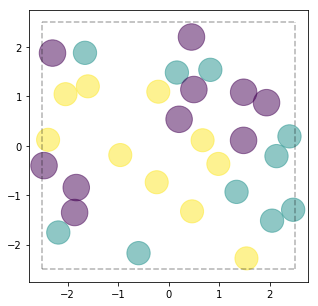

In [7]:
# run md
positions, velocities = molecular_dynamics(atoms, box, t_max=1.0)

# checkout initial position and make movie
movie = animate_md_traj(positions, atoms, box, speed=10)

In [19]:
HTML(movie.to_html5_video())

### Challenges:
    1. Extend to 3 dimensions
    2. Implement periodic boundary conditions
    3. Create molecules by adding bonded forces